In [1]:
#Task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("online_retail.csv") 
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
mean_value = df['UnitPrice'].mean()
print("Mean UnitPrice:", mean_value)

Mean UnitPrice: 4.611113626088513


In [5]:
median_value = df['UnitPrice'].median()
print("Median UnitPrice:", median_value)

Median UnitPrice: 2.08


In [6]:
mode_value = df['UnitPrice'].mode()[0]
print("Mode UnitPrice:", mode_value)

Mode UnitPrice: 1.25


In [8]:
def categorize_spending(amount):
    if amount < median_value:
        return "Low Spender"
    elif amount >= median_value and amount <= mean_value:
        return "Average Spender"
    else:
        return "High Spender"

df['spending_category'] = df['UnitPrice'].apply(categorize_spending)

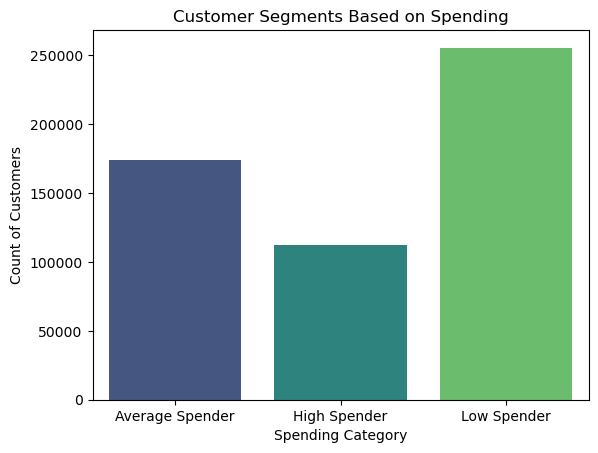

In [9]:
sns.countplot(x=df['spending_category'], palette="viridis")
plt.title("Customer Segments Based on Spending")
plt.xlabel("Spending Category")
plt.ylabel("Count of Customers")
plt.show()

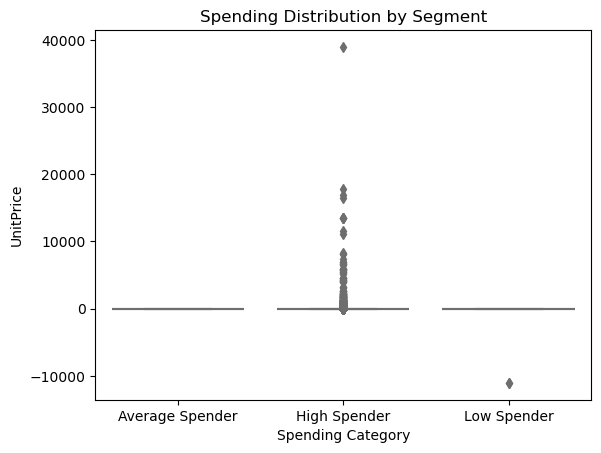

In [10]:
sns.boxplot(x=df['spending_category'], y=df['UnitPrice'], palette="coolwarm")
plt.title("Spending Distribution by Segment")
plt.xlabel("Spending Category")
plt.ylabel("UnitPrice")
plt.show()

Range: 50032.06
Variance: 9362.47
Standard Deviation: 96.76


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


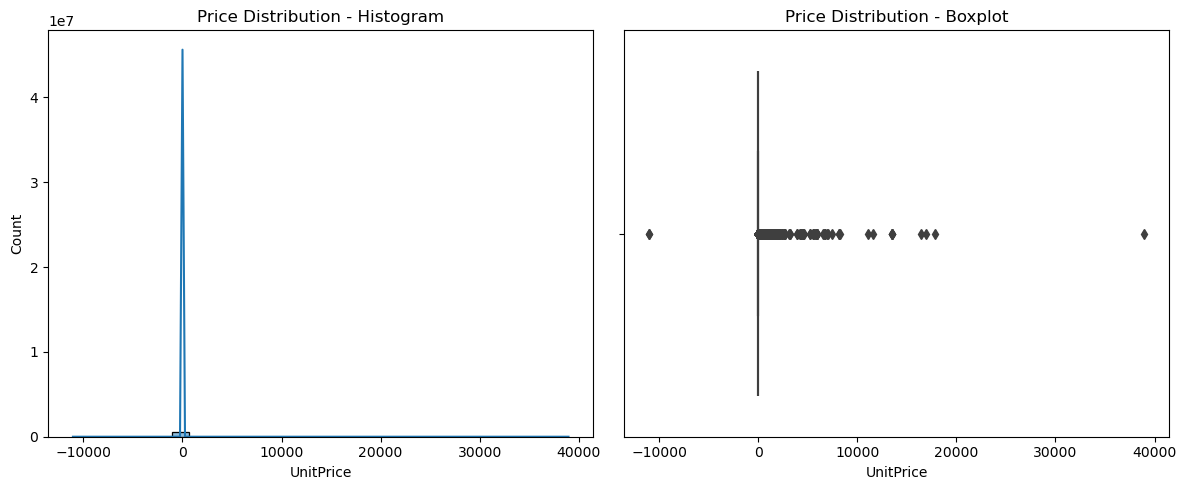

In [11]:
#Task 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail.csv")

prices = df["UnitPrice"].dropna()

price_range = prices.max() - prices.min()
variance = np.var(prices, ddof=1)
std_dev = np.std(prices, ddof=1)

print(f"Range: {price_range}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(prices, bins=30, kde=True)
plt.title("Price Distribution - Histogram")

plt.subplot(1, 2, 2)
sns.boxplot(x=prices)
plt.title("Price Distribution - Boxplot")

plt.tight_layout()
plt.show()

In [12]:
#Task 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Online_retail.csv")

In [13]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.month

month_1 = df[df["Month"] == 1]["Quantity"].dropna()
month_2 = df[df["Month"] == 2]["Quantity"].dropna()

In [14]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(month_1, month_2, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

T-statistic: -0.41
P-value: 0.68019


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


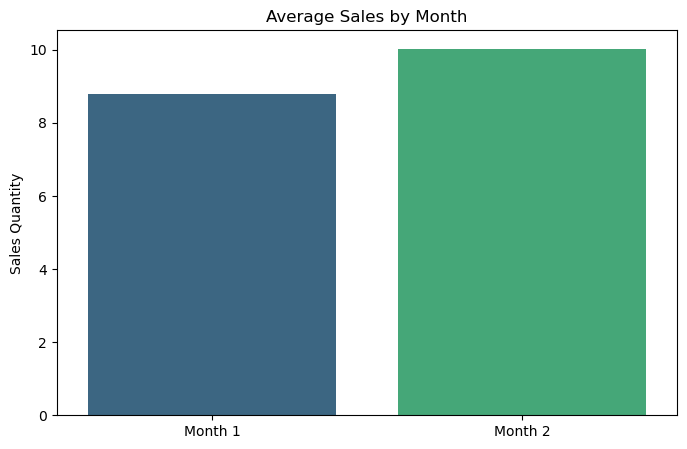

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=["Month 1", "Month 2"], y=[month_1.mean(), month_2.mean()], palette="viridis")
plt.title("Average Sales by Month")
plt.ylabel("Sales Quantity")
plt.show()

In [16]:
#Task 4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
df = pd.read_csv("USA Housing Dataset.csv")
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated                   stre

In [17]:
pearson_corr, pearson_p = pearsonr(df["sqft_living"], df["price"])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.5f}")
spearman_corr, spearman_p = spearmanr(df["sqft_living"], df["price"])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.5f}")

Pearson Correlation: 0.42, p-value: 0.00000
Spearman Correlation: 0.63, p-value: 0.00000


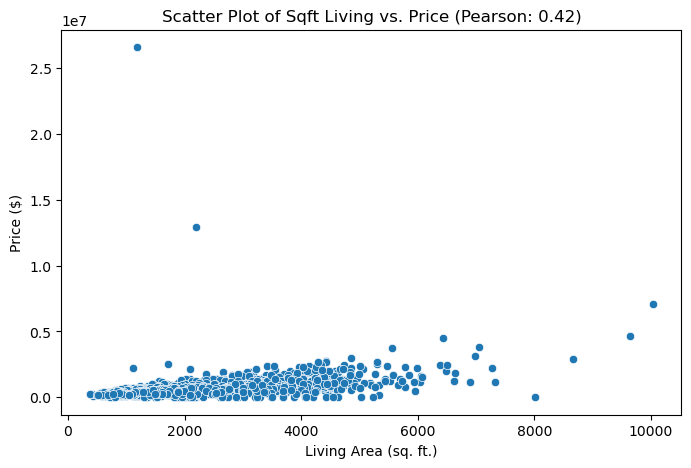

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["sqft_living"], y=df["price"])
plt.title(f"Scatter Plot of Sqft Living vs. Price (Pearson: {pearson_corr:.2f})")
plt.xlabel("Living Area (sq. ft.)")
plt.ylabel("Price ($)")
plt.show()